In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import sys

## Apendice

#### Pasos para la construcción del Panel

1. Importamos las EPH correspondientesy las filtramos  a traves del comando **df.filter()**, para dejar solo las variables que nos interesan para el estudio.


2. Unimos las encuestas hogar e indibvidual con el comando **df.merge()**, luego unimos las bases por año con la función **pd.concat()**


3. Eliminamos de la bases a traves de la función **df.drop()**, los casos de no respuesta y acotaremos el analisis a la población entre 14 y 45 años.

4. Creamos las categorías de análisis llamada *CATEGORIA*, que deseamos observar en los distintos períodos. Esta variable dividira a la población en 7 estados:

|CATEGORIA|Variable utilizada|
|-----|---------|
|INACTIVO|ESTADO==3|
|DESOCUPADO|ESTADO==2|
|ESTUDIANTE|ESTADO==2, CH10==1|
|ESTUDIANTE CON TRABAJO INFORMAL|ESTADO==1, CH10==1, CH08==4|
|ESTUDIANTE CON TRABAJO FORMAL|ESTADO==1, CH10==1, CH08!=4|
|TRABAJO INFORMAL|ESTADO==1, CH10==2, CH08==4|
|TRABAJO FORMAL |ESTADO==1, CH10==2, CH08!=4|

5. Cremaos la variable *EDUC*, para conocer la cantidad de años de educación formal de las personas

|Nivel|Completo|Variable utilizada|EDUC.|
|-----|--------|---------|-------|
|Preescolar|No|CH12=1,CH13=2|0|
|Preescolar|Sí|CH12=1,CH13=1|0|
|Primario|No|CH12**=2, CH13=2|CH14|
|Primario|Sí|CH12=2, CH13=1|6|
|Secundario|No|CH12=4, CH13=2<sup>[3]</sup>|CH14+6|
|Secundario|Si|CH12=4, CH13=1 |12|
|Terciario|No|CH12=6, CH13=2<sup>[4]</sup>|CH14+12|
|Terciario|Si|CH12=6, CH13=1|CH14+12|
|Universitario|No|CH12=7, CH13=2 <sup>[5]</sup>|CH14+12|
|Universitario|Si|CH12=7, CH13=1|CH14+12| 
|Posgrado|No|CH12=8, CH13=2<sup>[6]</sup> |CH14 + 17|
|Posgrado|Si|CH12=8, CH13=1|CH14+17|

6. Armamos un *identificador ordinal* para los registros de cada trimestre, al que llamaremos *ID_TRIMESTRE*


7. Cambiamos los nombres a todas las variables, a excepción de las que usaremos para indentificar a un mismo individuo (*CODUSU, NRO_HOGAR, COMPONENTE*)


8. Unimos ambas bases con la función **df.merge()** que solo nos dejará registros que en ambas bases contengan los mismos *CODUSU, NRO_HOGAR, COMPONENTE e indentificador ordinal*


9. Creamos la columna para consistencias, y luego filtramos la base para eliminar los registros incosistentes

In [52]:
#Paso 1

#Eph 2017(completa)
df117i = pd.read_csv('usu_individual_t117.txt', ';')
df217i = pd.read_csv('usu_individual_t217.txt', ';')
df317i = pd.read_csv('usu_individual_t317.txt', ';')
df417i = pd.read_csv('usu_individual_t417.txt', ';')

df117h = pd.read_csv('usu_hogar_t117.txt', ';')
df217h = pd.read_csv('usu_hogar_t217.txt', ';')
df317h = pd.read_csv('usu_hogar_t317.txt', ';')
df417h = pd.read_csv('usu_hogar_t417.txt', ';')

#Eph 2018(completa)
df118i = pd.read_csv('usu_individual_t118.txt', ';')
df218i = pd.read_csv('usu_individual_t218.txt', ';')
df318i = pd.read_csv('usu_individual_t318.txt', ';')
df418i = pd.read_csv('usu_individual_t418.txt', ';')

df118h = pd.read_csv('usu_hogar_t118.txt', ';')
df218h = pd.read_csv('usu_hogar_t218.txt', ';')
df318h = pd.read_csv('usu_hogar_t318.txt', ';')
df418h = pd.read_csv('usu_hogar_t418.txt', ';')


In [41]:
df117i = df117i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','NIVEL_ED','ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH12','CH10','CH11','CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])
df217i = df217i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','NIVEL_ED','ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH12','CH10','CH11', 'CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])
df317i = df317i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','NIVEL_ED','ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH12','CH10','CH11', 'CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])
df417i = df417i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','NIVEL_ED','ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH12','CH10','CH11', 'CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])

df117h = df117h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])
df217h = df217h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])
df317h = df317h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])
df417h = df417h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])


df118i = df118i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE', 'NIVEL_ED', 'ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH10','CH11','CH12', 'CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])
df218i = df218i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE', 'NIVEL_ED','ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH10','CH11','CH12', 'CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])
df318i = df318i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE', 'NIVEL_ED','ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH10','CH11','CH12', 'CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])
df418i = df418i.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE', 'NIVEL_ED','ESTADO','CAT_OCUP','PONDERA', 'CH04', 'CH06','CH08','CH10','CH11','CH12', 'CH13','CH14','P21','PP04C','PP04A','PP07G4','PP07H','PP02H','PP3E_TOT'])

df118h = df118h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])
df218h = df218h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])
df318h = df318h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])
df418h = df418h.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','PONDERA', 'IV1','IX_Tot','IX_Men10','ITF', 'IPCF'])


In [42]:
#Paso 2

#Año 2017
df117 = pd.merge(df117i, df117h, on=['CODUSU', 'NRO_HOGAR', 'ANO4', 'TRIMESTRE', 'PONDERA'])
df217 = pd.merge(df217i, df217h, on=['CODUSU', 'NRO_HOGAR','ANO4', 'TRIMESTRE', 'PONDERA'])
df317 = pd.merge(df317i, df317h, on=['CODUSU', 'NRO_HOGAR','ANO4', 'TRIMESTRE', 'PONDERA'])
df417 = pd.merge(df417i, df117h, on=['CODUSU', 'NRO_HOGAR','ANO4', 'TRIMESTRE', 'PONDERA'])

df17 = pd.concat([df117, df217, df317, df417])

#Año 2018
df118 = pd.merge(df118i, df118h, on=['CODUSU', 'NRO_HOGAR', 'ANO4', 'TRIMESTRE', 'PONDERA'])
df218 = pd.merge(df218i, df218h, on=['CODUSU', 'NRO_HOGAR','ANO4', 'TRIMESTRE', 'PONDERA'])
df318 = pd.merge(df318i, df318h, on=['CODUSU', 'NRO_HOGAR','ANO4', 'TRIMESTRE', 'PONDERA'])
df418 = pd.merge(df418i, df118h, on=['CODUSU', 'NRO_HOGAR','ANO4', 'TRIMESTRE', 'PONDERA'])

df18 = pd.concat([df118, df218, df318, df418])



In [43]:
#Paso 3

#Año 2017

df17 = df17.drop(df17[df17.CH06 < 14].index)      #Eliminamos a los menores de 14 años
df17 = df17.drop(df17[df17.CH06 > 45].index)      #Eliminamos a los mayores de 45 años
df17 = df17.drop(df17[df17.ESTADO==0].index)      #Elimiamos a los que no realizaron entrevista individual
df17 = df17.drop(df17[df17.ESTADO==4].index)      #Eliminamos a los menores de 10 años
df17 = df17.drop(df17[df17.CH12==9].index)        #Eliminamos a los que recibieron Educación Especial
df17 = df17.drop(df17[df17.CH14==98].index)       #Eliminamos a los que recibieron Educación Especial
df17 = df17.drop(df17[df17.CH13==9].index)        #Eliminamos a los que respondieron Ns./Nr.
df17 = df17.drop(df17[df17.CH14==99].index)       #Eliminamos a los que respondieron Ns./Nr.
df17 = df17.drop(df17[df17.CAT_OCUP==9].index)    #Eliminamos a los que respondieron Ns./Nr.
df17 = df17.drop(df17[df17.NIVEL_ED==9].index)    #Eliminamos a los que respondieron Ns./Nr.
df17 = df17.fillna(0)                             #Reemplazamos NaN's por 0's

#Año 2018

df18 = df18.drop(df18[df18.CH06 < 14].index)      #Eliminamos a los menores de 14 años
df18 = df18.drop(df18[df18.CH06 > 45].index)      #Eliminamos a los mayores de 45 años
df18 = df18.drop(df18[df18.ESTADO==0].index)      #Elimiamos a los que no realizaron entrevista individual 
df18 = df18.drop(df18[df18.ESTADO==4].index)      #Eliminamos a los menores de 10 años    
df18 = df18.drop(df18[df18.CH12==9].index)        #Eliminamos a los que recibieron Educación Especial
df18 = df18.drop(df18[df18.CH14==98].index)       #Eliminamos a los que recibieron Educación Especial
df18 = df18.drop(df18[df18.CH13==9].index)        #Eliminamos a los que respondieron Ns./Nr.
df18 = df18.drop(df18[df18.CAT_OCUP==9].index)    #Eliminamos a los que respondieron Ns./Nr.
df18 = df18.drop(df18[df18.CH14==99].index)       #Eliminamos a los que respondieron Ns./Nr. 
df18 = df18.drop(df18[df18.NIVEL_ED==9].index)    #Eliminamos a los que respondieron Ns./Nr.
df18 = df18.fillna(0)                             #Reemplazamos NaN's por 0's


In [44]:
#Paso 4

#AÑO 2018
df18['CATEGORIA'] = 0
df18.loc[(df18.ESTADO==3), 'CATEGORIA'] = "INACTIVOS"
df18.loc[(df18.ESTADO==2), 'CATEGORIA'] = "DESOCUPADOS"
df18.loc[(df18.ESTADO==2) & (df18.CH10==1), 'CATEGORIA'] = "ESTUDIANTE"
df18.loc[(df18.ESTADO==1) & (df18.CH10==1) & (df18.CH08==4), 'CATEGORIA'] = "ESTUDIANTE CON TRABAJO INFORMAL"
df18.loc[(df18.ESTADO==1) & (df18.CH10==1) & (df18.CH08!=4), 'CATEGORIA'] = "ESTUDIANTE CON TRABAJO FORMAL"
df18.loc[(df18.ESTADO==1) & (df18.CH10==2) & (df18.CH08==4), 'CATEGORIA'] = "TRABAJO INFORMAL"
df18.loc[(df18.ESTADO==1) & (df18.CH10==2) & (df18.CH08!=4), 'CATEGORIA'] = "TRABAJO FORMAL"


In [45]:
#Paso 5

#Año 2017
df17['EDUC'] = 0 

# preescolar incompleto y completa
df17.loc[(df17.CH12==1) & (df17.CH13==2), 'EDUC'] = 0
df17.loc[(df17.CH12==1) & (df17.CH13==1), 'EDUC'] = 0

# primaria incompleta y completa
df17.loc[(df17.CH12==2) & (df17.CH13==2), 'EDUC'] = "1 a 5"
df17.loc[(df17.CH12==2) & (df17.CH13==1), 'EDUC'] = "6"

# secundario incompleto y completo
df17.loc[(df17.CH12==4) & (df17.CH13==2), 'EDUC'] = "7 a 11"
df17.loc[(df17.CH12==4) & (df17.CH13==1), 'EDUC'] = "12"

# universitario incompleto y completo
df17.loc[(df17.CH12==7) & (df17.CH13==2), 'EDUC'] = "13 a 16"
df17.loc[(df17.CH12==7) & (df17.CH13==1), 'EDUC'] = "17"

# posgrado incompleto y completo
df17.loc[(df17.CH12==8) & (df17.CH13==2), 'EDUC'] = "18 a 20"
df17.loc[(df17.CH12==8) & (df17.CH13==1), 'EDUC'] = "21"

#Año2018
df18['EDUC'] = 0 
# preescolar incompleto y completa
df18.loc[(df18.CH12==1) & (df18.CH13==2), 'EDUC'] = 0
df18.loc[(df18.CH12==1) & (df18.CH13==1), 'EDUC'] = 0

# primaria incompleta y completa
df18.loc[(df18.CH12==2) & (df18.CH13==2), 'EDUC'] = "1 a 5"
df18.loc[(df18.CH12==2) & (df18.CH13==1), 'EDUC'] = "6"

# secundario incompleto y completo
df18.loc[(df18.CH12==4) & (df18.CH13==2), 'EDUC'] = "7 a 11"
df18.loc[(df18.CH12==4) & (df18.CH13==1), 'EDUC'] = "12"

# universitario incompleto y completo
df18.loc[(df18.CH12==7) & (df18.CH13==2), 'EDUC'] = "13 a 16"
df18.loc[(df18.CH12==7) & (df18.CH13==1), 'EDUC'] = "17"

# posgrado incompleto y completo
df18.loc[(df18.CH12==8) & (df18.CH13==2), 'EDUC'] = "18 a 20"
df18.loc[(df18.CH12==8) & (df18.CH13==1), 'EDUC'] = "21"

In [46]:
#Paso 6

df17['ID_TRIMESTRE'] = df17['ANO4'].astype(str) + '_' + df17['TRIMESTRE'].astype(str)
df18['ID_TRIMESTRE'] = df18['ANO4'].astype(str) + '_' + df18['TRIMESTRE'].astype(str)


In [47]:
#Paso 7
df17 = df17.rename(columns = {'ANO4': 'ANO4_17','TRIMESTRE': 'TRIMESTRE_17','NIVEL_ED':'NIVEL_ED17','ESTADO':'ESTADO_17','CAT_OCUP': 'CAT_OCUP_17','PONDERA': 'PONDERA_17', 'CH04':'CH04_17', 'CH06': 'CH06_17','CH08':'CH08_17','CH10':'CH10_17','CH11':'CH11_17', 'CH12':'CH12_17', 'CH13': 'CH13_17','P21':'P21_17','PP02H':'PP02H_17','PP04C':'PP04C_17','PP04A':'PP04A_17','PP3E_TOT':'PP3E_TOT_17', 'CATEGORIA':'CATEGORIA_17', 'EDUC':'EDUC_17','ID_TRIMESTRE': 'ID_TRIMESTRE_17'})
df17.head()

,CODUSU,NRO_HOGAR,COMPONENTE,ANO4_17,TRIMESTRE_17,NIVEL_ED17,ESTADO_17,CAT_OCUP_17,PONDERA_17,CH04_17,...,PP04A_17,PP07G4,PP07H,PP02H_17,PP3E_TOT_17,IV1,ITF,IPCF,EDUC_17,ID_TRIMESTRE_17
2,TQRMNOQURHKOMLCDEFIAH00469284,1,6,2017,1,3,3,0.0,861,1,...,0.0,0.0,0.0,2.0,0.0,1,0,0,7 a 11,2017_1
11,TQRMNOQURHKOMLCDEFIAH00469284,1,2,2017,1,2,3,0.0,861,1,...,0.0,0.0,0.0,2.0,0.0,1,0,0,6,2017_1
12,TQRMNOQURHKOMLCDEFIAH00469284,1,3,2017,1,2,1,3.0,861,1,...,2.0,2.0,2.0,0.0,48.0,1,0,0,6,2017_1
24,TQRMNOQUSHJOMMCDEFIAH00498029,1,2,2017,1,2,3,0.0,794,2,...,0.0,0.0,0.0,2.0,0.0,1,6000,2000,6,2017_1
30,TQRMNOTRXHKMKTCDEFIAH00469206,1,1,2017,1,5,1,3.0,579,1,...,1.0,1.0,1.0,0.0,30.0,2,0,0,13 a 16,2017_1


In [48]:
df18 = df18.rename(columns = {'ANO4': 'ANO4_18','TRIMESTRE': 'TRIMESTRE_18','NIVEL_ED':'NIVEL_ED18','ESTADO':'ESTADO_18','CAT_OCUP': 'CAT_OCUP_18','PONDERA': 'PONDERA_18','CH04':'CH04_18', 'CH06': 'CH06_18','CH08':'CH08_18','CH10':'CH10_18','CH11':'CH11_18','CH12':'CH12_18', 'CH13': 'CH13_18','P21':'P21_18','PP02H':'PP02H_18','PP04C':'PP04C_18','PP04A':'PP04A_18','PP3E_TOT':'PP3E_TOT_18', 'CATEGORIA':'CATEGORIA_18', 'EDUC':'EDUC_18', 'ID_TRIMESTRE': 'ID_TRIMESTRE_18'})
df18.head()

,CODUSU,NRO_HOGAR,COMPONENTE,ANO4_18,TRIMESTRE_18,NIVEL_ED18,ESTADO_18,CAT_OCUP_18,PONDERA_18,CH04_18,...,PP07G4,PP07H,PP02H_18,PP3E_TOT_18,IV1,ITF,IPCF,CATEGORIA_18,EDUC_18,ID_TRIMESTRE_18
1,TQRMNOTRTHLOLSCDEFKID00600863,1,1,2018,1,3,1,1.0,684,1,...,0.0,0.0,0,98.0,1,10000,"3333,33",TRABAJO INFORMAL,7 a 11,2018_1
42,TQRMNOPYSHMOLTCDEFIAH00507905,1,3,2018,1,4,1,3.0,916,1,...,2.0,2.0,0,30.0,1,0,0,TRABAJO INFORMAL,12,2018_1
50,TQRMNOQRTHMLKPCDEFIAH00507924,1,1,2018,1,4,1,3.0,1060,1,...,2.0,2.0,0,36.0,1,7000,7000,TRABAJO FORMAL,12,2018_1
53,TQRMNOSRUHKOMMCDEFIAH00606185,1,3,2018,1,3,1,3.0,532,2,...,2.0,2.0,0,49.0,1,11200,"3733,33",ESTUDIANTE CON TRABAJO INFORMAL,7 a 11,2018_1
54,TQRMNOSRTHKOMMCDEFIAH00606186,1,1,2018,1,4,3,0.0,532,2,...,0.0,0.0,2,0.0,1,18135,"2266,88",INACTIVOS,12,2018_1


In [49]:
#Paso 8
df1718 = pd.merge(df17, df18, on=['CODUSU', 'NRO_HOGAR', 'COMPONENTE'])
df1718.head()

,CODUSU,NRO_HOGAR,COMPONENTE,ANO4_17,TRIMESTRE_17,NIVEL_ED17,ESTADO_17,CAT_OCUP_17,PONDERA_17,CH04_17,...,PP07G4_y,PP07H_y,PP02H_18,PP3E_TOT_18,IV1_y,ITF_y,IPCF_y,CATEGORIA_18,EDUC_18,ID_TRIMESTRE_18
0,TQRMNOQUSHJOMMCDEFIAH00498029,1,2,2017,1,2,3,0.0,794,2,...,2.0,2.0,0,40.0,1,0,0,TRABAJO INFORMAL,6,2018_1
1,TQRMNOPVTHMMLMCDEFIAH00508004,1,2,2017,1,6,2,1.0,520,1,...,2.0,2.0,0,30.0,1,41100,20550,TRABAJO FORMAL,17,2018_1
2,TQRMNOVRVHJOKNCDEFIAH00498160,1,2,2017,1,2,2,3.0,784,1,...,2.0,2.0,0,45.0,1,16500,"2357,14",TRABAJO INFORMAL,6,2018_1
3,TQRMNOQPQHJOLTCDEFIAH00497973,1,5,2017,1,3,3,0.0,661,1,...,2.0,2.0,0,14.0,1,0,0,ESTUDIANTE CON TRABAJO INFORMAL,7 a 11,2018_1
4,TQRMNOQPQHJOLTCDEFIAH00497973,1,6,2017,1,3,1,2.0,661,2,...,2.0,2.0,0,12.0,1,0,0,TRABAJO INFORMAL,7 a 11,2018_1


In [50]:
#Paso 9
df1718['CONSISTENCIA'] = 'CONSISTENTE'

df1718.loc[abs((df1718.CH06_18)-(df1718.CH06_17))>2, 'CONSISTENCIA'] = 'INCOSISTENTE'
df1718.loc[(df1718.CH04_17)==(df1718.CH04_18), 'CONSISTENCIA'] = 'CONSISTENTE'

df1718['CONSISTENCIA'].describe()

count            2596
unique              2
top       CONSISTENTE
freq             2591
Name: CONSISTENCIA, dtype: object

In [51]:
df1718 = df1718.drop(df1718[df1718.CONSISTENCIA=='INCOSISTENTE'].index)
df1718 = df1718.drop(df1718[df1718.CATEGORIA_18==0].index)

## Matrices de transición para toda la población

### Cálculo de probabilidades de transición

1. Como queremos ver la probababilidad de transión de un jóven que en el año 2017 estaba en el sistema educativo, al sistema laboral en el 2018, vamos a dejar en la muestra solo los individuos que en 2018 buscaron trabajo a través de la variable *PP02H*

2. Vamos a crear un grupo con el comando **df.groupby()** donde nos calcula la cantidad de casos  posible entre **EDUC_t** y **CATEGORIA_t+1**. Luego calcularemos la probabilidad de encontrarse en categoría en *t1*, condicional de haber pertenecido a las distintas categorías en *t0*

## Año 2017 - 2018

In [52]:
# Paso 1
df1718 = df1718.drop(df1718[df1718.PP02H_18==2].index)

In [55]:
Prob1718 = pd.crosstab(df1718['CATEGORIA_18'],df1718['EDUC_17'], normalize=1)
Prob1718 = Prob1718*100
Prob1718

EDUC_17,0,1 a 5,12,13 a 16,17,18 a 20,21,6,7 a 11
CATEGORIA_18,,,,,,,,,
DESOCUPADOS,6.824926,19.047619,7.174888,4.639175,1.315789,33.333333,14.285714,10.526316,8.308605
ESTUDIANTE,2.077151,0.000000,0.224215,7.216495,0.657895,0.000000,0.000000,0.000000,2.077151
ESTUDIANTE CON TRABAJO FORMAL,8.011869,4.761905,1.345291,26.288660,3.947368,0.000000,0.000000,1.973684,5.044510
ESTUDIANTE CON TRABAJO INFORMAL,5.044510,0.000000,1.121076,5.670103,0.000000,0.000000,0.000000,0.000000,3.560831
INACTIVOS,2.373887,0.000000,1.121076,2.577320,1.973684,0.000000,0.000000,0.657895,2.670623
TRABAJO FORMAL,59.347181,14.285714,67.264574,40.721649,84.210526,66.666667,71.428571,34.868421,36.795252
TRABAJO INFORMAL,16.320475,61.904762,21.748879,12.886598,7.894737,0.000000,14.285714,51.973684,41.543027


In [56]:
prob1718 = np.array([[Prob1718.iat[4,0],Prob1718.iat[4,1],Prob1718.iat[4,7],Prob1718.iat[4,8],Prob1718.iat[4,2],Prob1718.iat[4,3],Prob1718.iat[4,4],Prob1718.iat[4,5],Prob1718.iat[4,6]],
                 [Prob1718.iat[0,0],Prob1718.iat[0,1],Prob1718.iat[0,7],Prob1718.iat[0,8],Prob1718.iat[0,2],Prob1718.iat[0,3],Prob1718.iat[0,4],Prob1718.iat[0,5],Prob1718.iat[0,6]],
                 [Prob1718.iat[1,0],Prob1718.iat[1,1],Prob1718.iat[1,7],Prob1718.iat[1,8],Prob1718.iat[1,2],Prob1718.iat[1,3],Prob1718.iat[1,4],Prob1718.iat[1,5],Prob1718.iat[1,6]],
                 [Prob1718.iat[2,0],Prob1718.iat[2,1],Prob1718.iat[2,7],Prob1718.iat[2,8],Prob1718.iat[2,2],Prob1718.iat[2,3],Prob1718.iat[2,4],Prob1718.iat[2,5],Prob1718.iat[2,6]],
                 [Prob1718.iat[3,0],Prob1718.iat[3,1],Prob1718.iat[3,7],Prob1718.iat[3,8],Prob1718.iat[3,2],Prob1718.iat[3,3],Prob1718.iat[3,4],Prob1718.iat[3,5],Prob1718.iat[3,6]],
                 [Prob1718.iat[5,0],Prob1718.iat[5,1],Prob1718.iat[5,7],Prob1718.iat[5,8],Prob1718.iat[5,2],Prob1718.iat[5,3],Prob1718.iat[5,4],Prob1718.iat[5,5],Prob1718.iat[5,6]],
                 [Prob1718.iat[6,0],Prob1718.iat[6,1],Prob1718.iat[6,7],Prob1718.iat[6,8],Prob1718.iat[6,2],Prob1718.iat[6,3],Prob1718.iat[6,4],Prob1718.iat[6,5],Prob1718.iat[6,6]]])
prob1718 = prob1718.round(4)

prob1718

array([[ 2.3739,  0.    ,  0.6579,  2.6706,  1.1211,  2.5773,  1.9737,
         0.    ,  0.    ],
       [ 6.8249, 19.0476, 10.5263,  8.3086,  7.1749,  4.6392,  1.3158,
        33.3333, 14.2857],
       [ 2.0772,  0.    ,  0.    ,  2.0772,  0.2242,  7.2165,  0.6579,
         0.    ,  0.    ],
       [ 8.0119,  4.7619,  1.9737,  5.0445,  1.3453, 26.2887,  3.9474,
         0.    ,  0.    ],
       [ 5.0445,  0.    ,  0.    ,  3.5608,  1.1211,  5.6701,  0.    ,
         0.    ,  0.    ],
       [59.3472, 14.2857, 34.8684, 36.7953, 67.2646, 40.7216, 84.2105,
        66.6667, 71.4286],
       [16.3205, 61.9048, 51.9737, 41.543 , 21.7489, 12.8866,  7.8947,
         0.    , 14.2857]])

<Figure size 720x720 with 0 Axes>

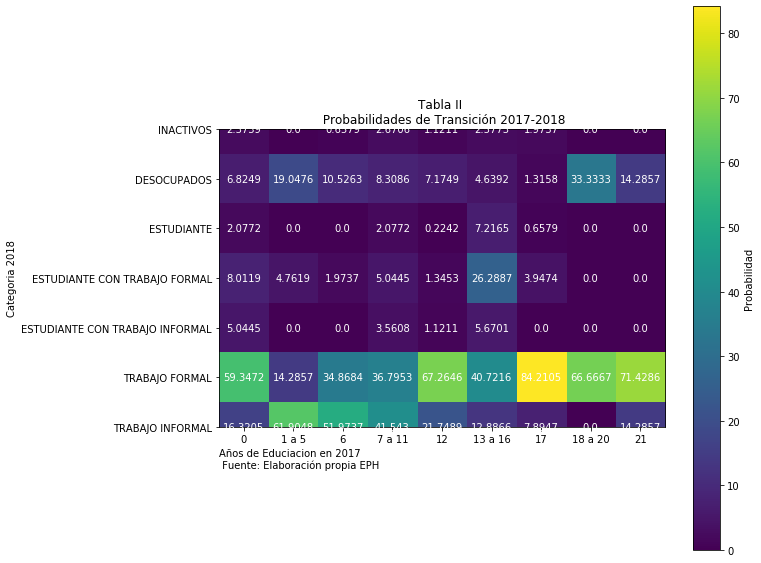

In [59]:
Educacion_17 = ["0", "1 a 5","6", "7 a 11","12", "13 a 16", "17", "18 a 20", "21"]
Categoria_18 = ["INACTIVOS","DESOCUPADOS", "ESTUDIANTE", "ESTUDIANTE CON TRABAJO FORMAL", "ESTUDIANTE CON TRABAJO INFORMAL",  "TRABAJO FORMAL", "TRABAJO INFORMAL"]
x = np.arange(len(Educacion_17))
y = np.arange(len(Categoria_18))
plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))


plt.imshow(prob1718)

plt.title('Tabla II \n Probabilidades de Transición 2017-2018')

plt.xlabel('Años de Educiacion en 2017 \n Fuente: Elaboración propia EPH', position=(0., 1e6), horizontalalignment='left')
plt.xticks(x, Educacion_17)

plt.ylabel('Categoria 2018')
plt.yticks(y, Categoria_18)

plt.colorbar(label='Probabilidad')

for i in range(len(Categoria_18)):
    for j in range(len(Educacion_17)):
        plt.text(j,i, prob1718[i, j], ha="center", va="center", color="w")
        
plt.show()

## Matrices de Transición para diferentes instituciones

### Tabla: "Matriz Transición para Escuela Pública 2017-2018"


In [23]:
df1718pu = df1718

df1718pu = df1718pu.drop(df1718pu[df1718pu.CH11_17==2].index)
df1718pu = df1718pu.drop(df1718pu[df1718pu.CH11_18==2].index)
df1718pu = df1718pu.drop(df1718pu[df1718pu.CH11_17==9].index)
df1718pu = df1718pu.drop(df1718pu[df1718pu.CH11_18==9].index)


In [24]:
Prob1718pu = pd.crosstab(df1718pu['CATEGORIA_18'],df1718pu['EDUC_17'], normalize=1)
Prob1718pu = Prob1718pu*100
Prob1718pu

EDUC_17,0,1 a 5,12,13 a 16,17,18 a 20,21,6,7 a 11
CATEGORIA_18,,,,,,,,,
DESOCUPADOS,7.457627,0.000000,7.407407,6.097561,3.174603,100.0,12.5,10.759494,9.646302
ESTUDIANTE,1.355932,0.000000,0.231481,3.048780,0.793651,0.0,0.0,0.000000,2.572347
ESTUDIANTE CON TRABAJO FORMAL,4.745763,0.000000,1.620370,24.390244,2.380952,0.0,0.0,1.265823,4.823151
ESTUDIANTE CON TRABAJO INFORMAL,3.728814,0.000000,1.388889,4.268293,0.000000,0.0,0.0,0.632911,3.215434
INACTIVOS,2.372881,0.000000,2.546296,4.878049,0.000000,0.0,0.0,1.265823,1.607717
TRABAJO FORMAL,61.694915,38.095238,60.879630,43.902439,86.507937,0.0,75.0,34.177215,38.585209
TRABAJO INFORMAL,18.644068,61.904762,25.925926,13.414634,7.142857,0.0,12.5,51.898734,39.549839


In [25]:
prob1718pu = np.array([[Prob1718pu.iat[4,0],Prob1718pu.iat[4,1],Prob1718pu.iat[4,7],Prob1718pu.iat[4,8],Prob1718pu.iat[4,2],Prob1718pu.iat[4,3],Prob1718pu.iat[4,4],Prob1718pu.iat[4,5],Prob1718pu.iat[4,6]],
                 [Prob1718pu.iat[0,0],Prob1718pu.iat[0,1],Prob1718pu.iat[0,7],Prob1718pu.iat[0,8],Prob1718pu.iat[0,2],Prob1718pu.iat[0,3],Prob1718pu.iat[0,4],Prob1718pu.iat[0,5],Prob1718pu.iat[0,6]],
                 [Prob1718pu.iat[1,0],Prob1718pu.iat[1,1],Prob1718pu.iat[1,7],Prob1718pu.iat[1,8],Prob1718pu.iat[1,2],Prob1718pu.iat[1,3],Prob1718pu.iat[1,4],Prob1718pu.iat[1,5],Prob1718pu.iat[1,6]],
                 [Prob1718pu.iat[2,0],Prob1718pu.iat[2,1],Prob1718pu.iat[2,7],Prob1718pu.iat[2,8],Prob1718pu.iat[2,2],Prob1718pu.iat[2,3],Prob1718pu.iat[2,4],Prob1718pu.iat[2,5],Prob1718pu.iat[2,6]],
                 [Prob1718pu.iat[3,0],Prob1718pu.iat[3,1],Prob1718pu.iat[3,7],Prob1718pu.iat[3,8],Prob1718pu.iat[3,2],Prob1718pu.iat[3,3],Prob1718pu.iat[3,4],Prob1718pu.iat[3,5],Prob1718pu.iat[3,6]],
                 [Prob1718pu.iat[5,0],Prob1718pu.iat[5,1],Prob1718pu.iat[5,7],Prob1718pu.iat[5,8],Prob1718pu.iat[5,2],Prob1718pu.iat[5,3],Prob1718pu.iat[5,4],Prob1718pu.iat[5,5],Prob1718pu.iat[5,6]],
                 [Prob1718pu.iat[6,0],Prob1718pu.iat[6,1],Prob1718pu.iat[6,7],Prob1718pu.iat[6,8],Prob1718pu.iat[6,2],Prob1718pu.iat[6,3],Prob1718pu.iat[6,4],Prob1718pu.iat[6,5],Prob1718pu.iat[6,6]]])
prob1718pu = prob1718pu.round(4)

prob1718pu

array([[  2.3729,   0.    ,   1.2658,   1.6077,   2.5463,   4.878 ,
          0.    ,   0.    ,   0.    ],
       [  7.4576,   0.    ,  10.7595,   9.6463,   7.4074,   6.0976,
          3.1746, 100.    ,  12.5   ],
       [  1.3559,   0.    ,   0.    ,   2.5723,   0.2315,   3.0488,
          0.7937,   0.    ,   0.    ],
       [  4.7458,   0.    ,   1.2658,   4.8232,   1.6204,  24.3902,
          2.381 ,   0.    ,   0.    ],
       [  3.7288,   0.    ,   0.6329,   3.2154,   1.3889,   4.2683,
          0.    ,   0.    ,   0.    ],
       [ 61.6949,  38.0952,  34.1772,  38.5852,  60.8796,  43.9024,
         86.5079,   0.    ,  75.    ],
       [ 18.6441,  61.9048,  51.8987,  39.5498,  25.9259,  13.4146,
          7.1429,   0.    ,  12.5   ]])

<Figure size 720x720 with 0 Axes>

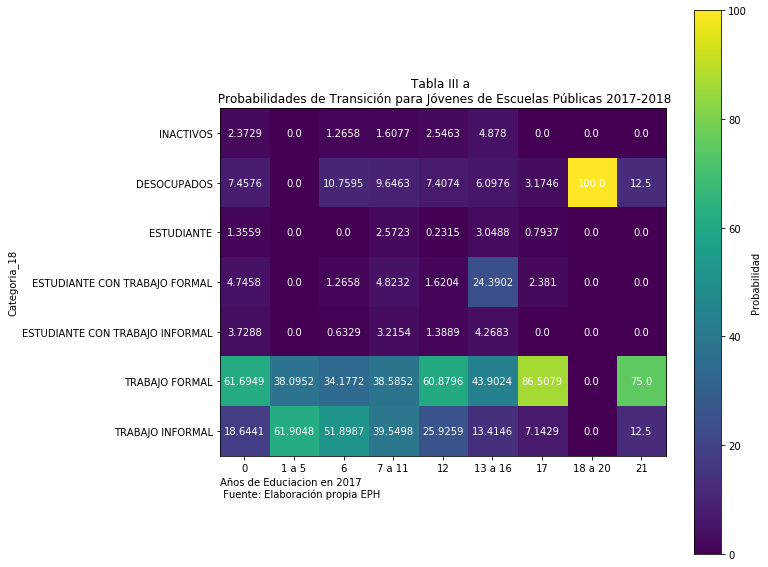

In [26]:
Educacion_17 = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
Categoria_18 = ["INACTIVOS","DESOCUPADOS", "ESTUDIANTE", "ESTUDIANTE CON TRABAJO FORMAL", "ESTUDIANTE CON TRABAJO INFORMAL", "TRABAJO FORMAL", "TRABAJO INFORMAL"]
x = np.arange(len(Educacion_17))
y = np.arange(len(Categoria_18))
plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))

plt.imshow(prob1718pu)

plt.title('Tabla III a \n Probabilidades de Transición para Jóvenes de Escuelas Públicas 2017-2018')

plt.xlabel('Años de Educiacion en 2017 \n Fuente: Elaboración propia EPH', position=(0., 1e6), horizontalalignment='left')
plt.xticks(x, Educacion_17)

plt.ylabel('Categoria_18')
plt.yticks(y, Categoria_18)

plt.colorbar(label='Probabilidad')

for i in range(len(Categoria_18)):
    for j in range(len(Educacion_17)):
        plt.text(j,i, prob1718pu[i, j], ha="center", va="center", color="w")
        
#plt.savefig("matriz1718h.png")
plt.show()

### Tabla: "Matriz Transición para Escuela Privada 2017-2018"

In [27]:
df1718pr = df1718

df1718pr = df1718pr.drop(df1718pr[df1718pr.CH11_17==1].index)
df1718pr = df1718pr.drop(df1718pr[df1718pr.CH11_18==1].index)
df1718pu = df1718pu.drop(df1718pu[df1718pu.CH11_17==9].index)
df1718pu = df1718pu.drop(df1718pu[df1718pu.CH11_18==9].index)


In [28]:
Prob1718pr = pd.crosstab(df1718pr['CATEGORIA_18'],df1718pr['EDUC_17'], normalize=1)
Prob1718pr = Prob1718pr*100
Prob1718pr

EDUC_17,0,1 a 5,12,13 a 16,17,18 a 20,21,6,7 a 11
CATEGORIA_18,,,,,,,,,
DESOCUPADOS,6.274510,0.0,7.565012,7.777778,3.252033,33.333333,12.5,10.897436,7.916667
ESTUDIANTE,2.352941,0.0,0.000000,2.222222,0.000000,0.000000,0.0,0.000000,0.000000
ESTUDIANTE CON TRABAJO FORMAL,2.352941,0.0,0.709220,11.111111,0.813008,0.000000,0.0,0.641026,0.416667
ESTUDIANTE CON TRABAJO INFORMAL,0.784314,0.0,0.472813,1.111111,0.000000,0.000000,0.0,0.000000,0.000000
INACTIVOS,1.960784,0.0,2.600473,0.000000,0.000000,0.000000,0.0,1.282051,2.083333
TRABAJO FORMAL,68.235294,40.0,62.174941,61.111111,88.617886,66.666667,75.0,34.615385,44.166667
TRABAJO INFORMAL,18.039216,60.0,26.477541,16.666667,7.317073,0.000000,12.5,52.564103,45.416667


In [29]:
prob1718pr = np.array([[Prob1718pr.iat[4,0],Prob1718pr.iat[4,1],Prob1718pr.iat[4,7],Prob1718pr.iat[4,8],Prob1718pr.iat[4,2],Prob1718pr.iat[4,3],Prob1718pr.iat[4,4],Prob1718pr.iat[4,5],Prob1718pr.iat[4,6]],
                 [Prob1718pr.iat[0,0],Prob1718pr.iat[0,1],Prob1718pr.iat[0,7],Prob1718pr.iat[0,8],Prob1718pr.iat[0,2],Prob1718pr.iat[0,3],Prob1718pr.iat[0,4],Prob1718pr.iat[0,5],Prob1718pr.iat[0,6]],
                 [Prob1718pr.iat[1,0],Prob1718pr.iat[1,1],Prob1718pr.iat[1,7],Prob1718pr.iat[1,8],Prob1718pr.iat[1,2],Prob1718pr.iat[1,3],Prob1718pr.iat[1,4],Prob1718pr.iat[1,5],Prob1718pr.iat[1,6]],
                 [Prob1718pr.iat[2,0],Prob1718pr.iat[2,1],Prob1718pr.iat[2,7],Prob1718pr.iat[2,8],Prob1718pr.iat[2,2],Prob1718pr.iat[2,3],Prob1718pr.iat[2,4],Prob1718pr.iat[2,5],Prob1718pr.iat[2,6]],
                 [Prob1718pr.iat[3,0],Prob1718pr.iat[3,1],Prob1718pr.iat[3,7],Prob1718pr.iat[3,8],Prob1718pr.iat[3,2],Prob1718pr.iat[3,3],Prob1718pr.iat[3,4],Prob1718pr.iat[3,5],Prob1718pr.iat[3,6]],
                 [Prob1718pr.iat[5,0],Prob1718pr.iat[5,1],Prob1718pr.iat[5,7],Prob1718pr.iat[5,8],Prob1718pr.iat[5,2],Prob1718pr.iat[5,3],Prob1718pr.iat[5,4],Prob1718pr.iat[5,5],Prob1718pr.iat[5,6]],
                 [Prob1718pr.iat[6,0],Prob1718pr.iat[6,1],Prob1718pr.iat[6,7],Prob1718pr.iat[6,8],Prob1718pr.iat[6,2],Prob1718pr.iat[6,3],Prob1718pr.iat[6,4],Prob1718pr.iat[6,5],Prob1718pr.iat[6,6]]])
prob1718pr = prob1718pr.round(4)

prob1718pr

array([[ 1.9608,  0.    ,  1.2821,  2.0833,  2.6005,  0.    ,  0.    ,
         0.    ,  0.    ],
       [ 6.2745,  0.    , 10.8974,  7.9167,  7.565 ,  7.7778,  3.252 ,
        33.3333, 12.5   ],
       [ 2.3529,  0.    ,  0.    ,  0.    ,  0.    ,  2.2222,  0.    ,
         0.    ,  0.    ],
       [ 2.3529,  0.    ,  0.641 ,  0.4167,  0.7092, 11.1111,  0.813 ,
         0.    ,  0.    ],
       [ 0.7843,  0.    ,  0.    ,  0.    ,  0.4728,  1.1111,  0.    ,
         0.    ,  0.    ],
       [68.2353, 40.    , 34.6154, 44.1667, 62.1749, 61.1111, 88.6179,
        66.6667, 75.    ],
       [18.0392, 60.    , 52.5641, 45.4167, 26.4775, 16.6667,  7.3171,
         0.    , 12.5   ]])

<Figure size 720x720 with 0 Axes>

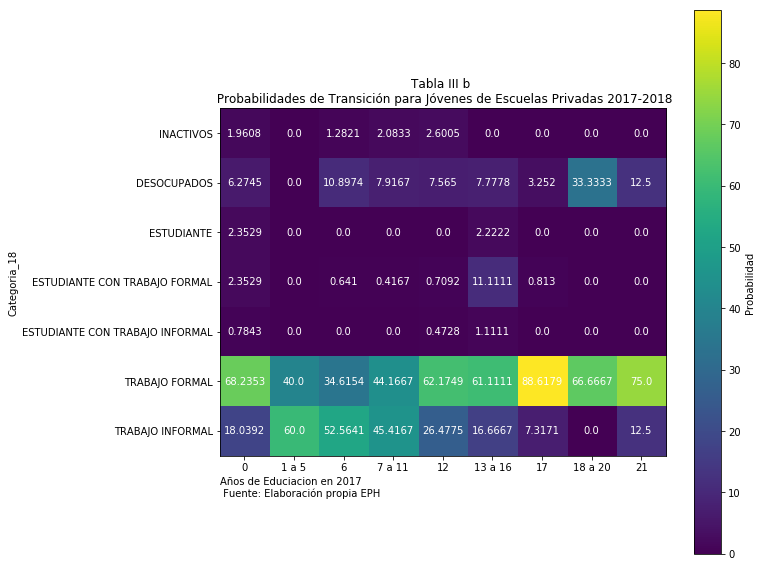

In [30]:
Educacion_17 = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
Categoria_18 = ["INACTIVOS", "DESOCUPADOS", "ESTUDIANTE", "ESTUDIANTE CON TRABAJO FORMAL", "ESTUDIANTE CON TRABAJO INFORMAL","TRABAJO FORMAL", "TRABAJO INFORMAL"]
x = np.arange(len(Educacion_17))
y = np.arange(len(Categoria_18))
plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))

plt.imshow(prob1718pr)

plt.title('Tabla III b \n Probabilidades de Transición para Jóvenes de Escuelas Privadas 2017-2018')

plt.xlabel('Años de Educiacion en 2017 \n Fuente: Elaboración propia EPH', position=(0., 1e6), horizontalalignment='left')
plt.xticks(x, Educacion_17)

plt.ylabel('Categoria_18')
plt.yticks(y, Categoria_18)

plt.colorbar(label='Probabilidad')

for i in range(len(Categoria_18)):
    for j in range(len(Educacion_17)):
        plt.text(j,i, prob1718pr[i, j], ha="center", va="center", color="w")
        
#plt.savefig("matriz1718h.png")
plt.show()

## Matrices de transición para diferentes sexos



### Tabla IV.a : "Matriz Transición para Hombres 2017-2018"

In [31]:
df1718h= df1718

df1718h = df1718h.drop(df1718h[df1718h.CH04_17==2].index)
df1718h = df1718h.drop(df1718h[df1718h.CH04_18==2].index)

In [32]:
Prob1718h = pd.crosstab(df1718h['CATEGORIA_18'],df1718h['EDUC_17'], normalize=1)
Prob1718h = Prob1718h*100
Prob1718h

EDUC_17,0,1 a 5,12,13 a 16,17,18 a 20,21,6,7 a 11
CATEGORIA_18,,,,,,,,,
DESOCUPADOS,3.623188,0.000000,7.782101,7.0,3.636364,0.0,0.0,8.571429,9.478673
ESTUDIANTE,3.623188,0.000000,0.389105,6.0,0.000000,0.0,0.0,0.000000,2.369668
ESTUDIANTE CON TRABAJO FORMAL,3.623188,0.000000,1.167315,25.0,5.454545,0.0,0.0,1.904762,6.161137
ESTUDIANTE CON TRABAJO INFORMAL,5.072464,0.000000,1.945525,4.0,0.000000,0.0,0.0,0.000000,4.739336
INACTIVOS,1.449275,0.000000,1.167315,4.0,0.000000,0.0,0.0,0.952381,0.947867
TRABAJO FORMAL,57.246377,36.363636,61.478599,38.0,83.636364,100.0,100.0,35.238095,38.862559
TRABAJO INFORMAL,25.362319,63.636364,26.070039,16.0,7.272727,0.0,0.0,53.333333,37.440758


In [33]:
prob1718h = np.array([[Prob1718h.iat[4,0],Prob1718h.iat[4,1],Prob1718h.iat[4,7],Prob1718h.iat[4,8],Prob1718h.iat[4,2],Prob1718h.iat[4,3],Prob1718h.iat[4,4],Prob1718h.iat[4,5],Prob1718h.iat[4,6]],
                 [Prob1718h.iat[0,0],Prob1718h.iat[0,1],Prob1718h.iat[0,7],Prob1718h.iat[0,8],Prob1718h.iat[0,2],Prob1718h.iat[0,3],Prob1718h.iat[0,4],Prob1718h.iat[0,5],Prob1718h.iat[0,6]],
                 [Prob1718h.iat[1,0],Prob1718h.iat[1,1],Prob1718h.iat[1,7],Prob1718h.iat[1,8],Prob1718h.iat[1,2],Prob1718h.iat[1,3],Prob1718h.iat[1,4],Prob1718h.iat[1,5],Prob1718h.iat[1,6]],
                 [Prob1718h.iat[2,0],Prob1718h.iat[2,1],Prob1718h.iat[2,7],Prob1718h.iat[2,8],Prob1718h.iat[2,2],Prob1718h.iat[2,3],Prob1718h.iat[2,4],Prob1718h.iat[2,5],Prob1718h.iat[2,6]],
                 [Prob1718h.iat[3,0],Prob1718h.iat[3,1],Prob1718h.iat[3,7],Prob1718h.iat[3,8],Prob1718h.iat[3,2],Prob1718h.iat[3,3],Prob1718h.iat[3,4],Prob1718h.iat[3,5],Prob1718h.iat[3,6]],
                 [Prob1718h.iat[5,0],Prob1718h.iat[5,1],Prob1718h.iat[5,7],Prob1718h.iat[5,8],Prob1718h.iat[5,2],Prob1718h.iat[5,3],Prob1718h.iat[5,4],Prob1718h.iat[5,5],Prob1718h.iat[5,6]],
                 [Prob1718h.iat[6,0],Prob1718h.iat[6,1],Prob1718h.iat[6,7],Prob1718h.iat[6,8],Prob1718h.iat[6,2],Prob1718h.iat[6,3],Prob1718h.iat[6,4],Prob1718h.iat[6,5],Prob1718h.iat[6,6]]])
prob1718h = prob1718h.round(4)

prob1718h

array([[  1.4493,   0.    ,   0.9524,   0.9479,   1.1673,   4.    ,
          0.    ,   0.    ,   0.    ],
       [  3.6232,   0.    ,   8.5714,   9.4787,   7.7821,   7.    ,
          3.6364,   0.    ,   0.    ],
       [  3.6232,   0.    ,   0.    ,   2.3697,   0.3891,   6.    ,
          0.    ,   0.    ,   0.    ],
       [  3.6232,   0.    ,   1.9048,   6.1611,   1.1673,  25.    ,
          5.4545,   0.    ,   0.    ],
       [  5.0725,   0.    ,   0.    ,   4.7393,   1.9455,   4.    ,
          0.    ,   0.    ,   0.    ],
       [ 57.2464,  36.3636,  35.2381,  38.8626,  61.4786,  38.    ,
         83.6364, 100.    , 100.    ],
       [ 25.3623,  63.6364,  53.3333,  37.4408,  26.07  ,  16.    ,
          7.2727,   0.    ,   0.    ]])

<Figure size 720x720 with 0 Axes>

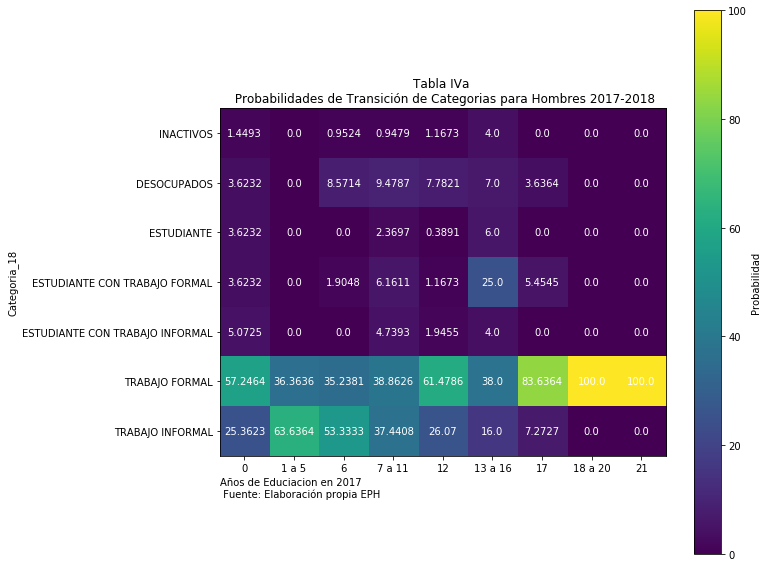

In [34]:
Educacion_17 = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
Categoria_18 = ["INACTIVOS","DESOCUPADOS", "ESTUDIANTE", "ESTUDIANTE CON TRABAJO FORMAL", "ESTUDIANTE CON TRABAJO INFORMAL","TRABAJO FORMAL", "TRABAJO INFORMAL"]
x = np.arange(len(Educacion_17))
y = np.arange(len(Categoria_18))
plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))

plt.imshow(prob1718h)

plt.title('Tabla IVa \n Probabilidades de Transición de Categorias para Hombres 2017-2018')

plt.xlabel('Años de Educiacion en 2017 \n Fuente: Elaboración propia EPH', position=(0., 1e6), horizontalalignment='left')
plt.xticks(x, Educacion_17)

plt.ylabel('Categoria_18')
plt.yticks(y, Categoria_18)

plt.colorbar(label='Probabilidad')

for i in range(len(Categoria_18)):
    for j in range(len(Educacion_17)):
        plt.text(j,i, prob1718h[i, j], ha="center", va="center", color="w")
        
#plt.savefig("matriz1718h.png")
plt.show()

### Tabla IV.b: "Matriz Transición para Mujeres 2017-2018"

In [35]:
df1718m= df1718

df1718m = df1718m.drop(df1718m[df1718m.CH04_17==1].index)

In [36]:
Prob1718m = pd.crosstab(df1718m['CATEGORIA_18'],df1718m['EDUC_17'], normalize=1)
Prob1718m = Prob1718m*100
Prob1718m

EDUC_17,0,1 a 5,12,13 a 16,17,18 a 20,21,6,7 a 11
CATEGORIA_18,,,,,,,,,
DESOCUPADOS,10.674157,0.0,6.179775,5.494505,2.816901,50.0,33.333333,15.094340,10.377358
ESTUDIANTE,2.808989,0.0,0.000000,3.296703,1.408451,0.0,0.000000,0.000000,2.830189
ESTUDIANTE CON TRABAJO FORMAL,8.426966,0.0,3.932584,31.868132,1.408451,0.0,0.000000,1.886792,5.660377
ESTUDIANTE CON TRABAJO INFORMAL,3.932584,0.0,1.685393,6.593407,0.000000,0.0,0.000000,1.886792,0.000000
INACTIVOS,3.370787,0.0,4.494382,4.395604,0.000000,0.0,0.000000,1.886792,6.603774
TRABAJO FORMAL,59.550562,40.0,58.988764,40.659341,87.323944,50.0,33.333333,30.188679,34.905660
TRABAJO INFORMAL,11.235955,60.0,24.719101,7.692308,7.042254,0.0,33.333333,49.056604,39.622642


In [37]:
prob1718m = np.array([[Prob1718m.iat[4,0],Prob1718m.iat[4,1],Prob1718m.iat[4,7],Prob1718m.iat[4,8],Prob1718m.iat[4,2],Prob1718m.iat[4,3],Prob1718m.iat[4,4],Prob1718m.iat[4,5],Prob1718m.iat[4,6]],
                 [Prob1718m.iat[0,0],Prob1718m.iat[0,1],Prob1718m.iat[0,7],Prob1718m.iat[0,8],Prob1718m.iat[0,2],Prob1718m.iat[0,3],Prob1718m.iat[0,4],Prob1718m.iat[0,5],Prob1718m.iat[0,6]],
                 [Prob1718m.iat[1,0],Prob1718m.iat[1,1],Prob1718m.iat[1,7],Prob1718m.iat[1,8],Prob1718m.iat[1,2],Prob1718m.iat[1,3],Prob1718m.iat[1,4],Prob1718m.iat[1,5],Prob1718m.iat[1,6]],
                 [Prob1718m.iat[2,0],Prob1718m.iat[2,1],Prob1718m.iat[2,7],Prob1718m.iat[2,8],Prob1718m.iat[2,2],Prob1718m.iat[2,3],Prob1718m.iat[2,4],Prob1718m.iat[2,5],Prob1718m.iat[2,6]],
                 [Prob1718m.iat[3,0],Prob1718m.iat[3,1],Prob1718m.iat[3,7],Prob1718m.iat[3,8],Prob1718m.iat[3,2],Prob1718m.iat[3,3],Prob1718m.iat[3,4],Prob1718m.iat[3,5],Prob1718m.iat[3,6]],
                 [Prob1718m.iat[5,0],Prob1718m.iat[5,1],Prob1718m.iat[5,7],Prob1718m.iat[5,8],Prob1718m.iat[5,2],Prob1718m.iat[5,3],Prob1718m.iat[5,4],Prob1718m.iat[5,5],Prob1718m.iat[5,6]],
                 [Prob1718m.iat[6,0],Prob1718m.iat[6,1],Prob1718m.iat[6,7],Prob1718m.iat[6,8],Prob1718m.iat[6,2],Prob1718m.iat[6,3],Prob1718m.iat[6,4],Prob1718m.iat[6,5],Prob1718m.iat[6,6]]])
prob1718m = prob1718m.round(4)

prob1718m

array([[ 3.3708,  0.    ,  1.8868,  6.6038,  4.4944,  4.3956,  0.    ,
         0.    ,  0.    ],
       [10.6742,  0.    , 15.0943, 10.3774,  6.1798,  5.4945,  2.8169,
        50.    , 33.3333],
       [ 2.809 ,  0.    ,  0.    ,  2.8302,  0.    ,  3.2967,  1.4085,
         0.    ,  0.    ],
       [ 8.427 ,  0.    ,  1.8868,  5.6604,  3.9326, 31.8681,  1.4085,
         0.    ,  0.    ],
       [ 3.9326,  0.    ,  1.8868,  0.    ,  1.6854,  6.5934,  0.    ,
         0.    ,  0.    ],
       [59.5506, 40.    , 30.1887, 34.9057, 58.9888, 40.6593, 87.3239,
        50.    , 33.3333],
       [11.236 , 60.    , 49.0566, 39.6226, 24.7191,  7.6923,  7.0423,
         0.    , 33.3333]])

<Figure size 720x720 with 0 Axes>

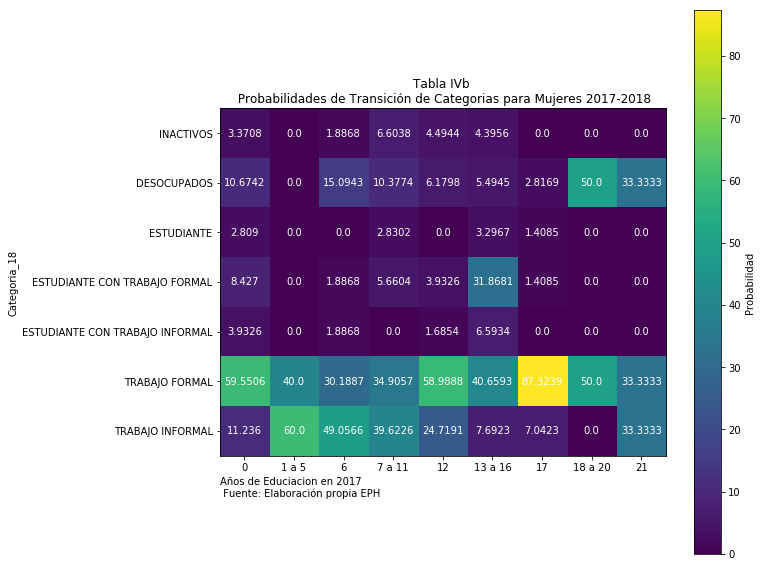

In [38]:
Educacion_17 = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
Categoria_18 = ["INACTIVOS","DESOCUPADOS", "ESTUDIANTE", "ESTUDIANTE CON TRABAJO FORMAL", "ESTUDIANTE CON TRABAJO INFORMAL",  "TRABAJO FORMAL", "TRABAJO INFORMAL"]
x = np.arange(len(Educacion_17))
y = np.arange(len(Categoria_18))
plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))

plt.imshow(prob1718m)

plt.title('Tabla IVb \n Probabilidades de Transición de Categorias para Mujeres 2017-2018')

plt.xlabel('Años de Educiacion en 2017 \n Fuente: Elaboración propia EPH', position=(0., 1e6), horizontalalignment='left')
plt.xticks(x, Educacion_17)

plt.ylabel('Categoria_18')
plt.yticks(y, Categoria_18)

plt.colorbar(label='Probabilidad')

for i in range(len(Categoria_18)):
    for j in range(len(Educacion_17)):
        plt.text(j,i, prob1718m[i, j], ha="center", va="center", color="w")
        
#plt.savefig("matriz1718m.png")
plt.show()

### Graficos

### Fig. I: "Probabilidad de quedar desempleado, comparacion entre Escuela Pública y Escuela Privada"



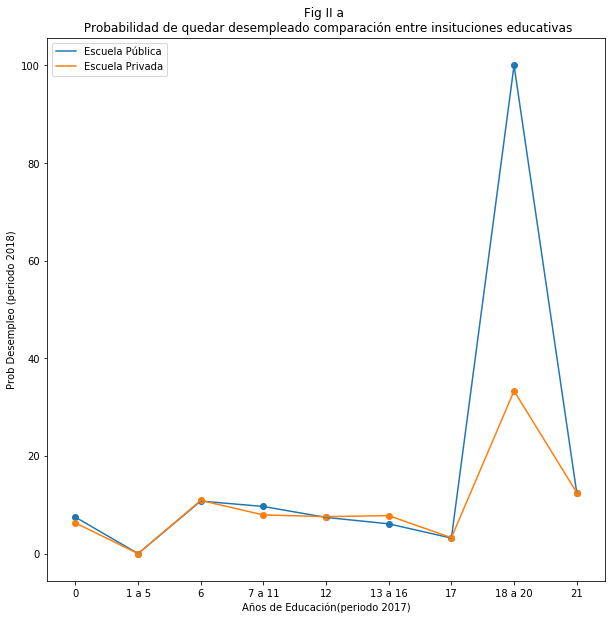

In [39]:
x1718pu = np.array([Prob1718pu.iat[0,0],Prob1718pu.iat[0,1],Prob1718pu.iat[0,7],Prob1718pu.iat[0,8],Prob1718pu.iat[0,2],Prob1718pu.iat[0,3],Prob1718pu.iat[0,4],Prob1718pu.iat[0,5],Prob1718pu.iat[0,6]])
x1718pr = np.array([Prob1718pr.iat[0,0],Prob1718pr.iat[0,1],Prob1718pr.iat[0,7],Prob1718pr.iat[0,8],Prob1718pr.iat[0,2],Prob1718pr.iat[0,3],Prob1718pr.iat[0,4],Prob1718pr.iat[0,5],Prob1718pr.iat[0,6]])

Años = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
x1 = np.arange(len(Años))

plt.figure(figsize=(10,10))

plt.plot(x1, x1718pu)
plt.scatter(x1, x1718pu)

plt.plot(x1, x1718pr)
plt.scatter(x1, x1718pr)

plt.title('Fig II a \n Probabilidad de quedar desempleado comparación entre insituciones educativas')

plt.xlabel('Años de Educación(periodo 2017)')
plt.ylabel('Prob Desempleo (periodo 2018)')

plt.xticks(x1,Años)

plt.legend(['Escuela Pública','Escuela Privada'])

plt.savefig("figIIa.png")
plt.show()

### Fig. II: " Probabilidad de consiguir trabajo formal e informal, Comparación entre escuela pública y privada

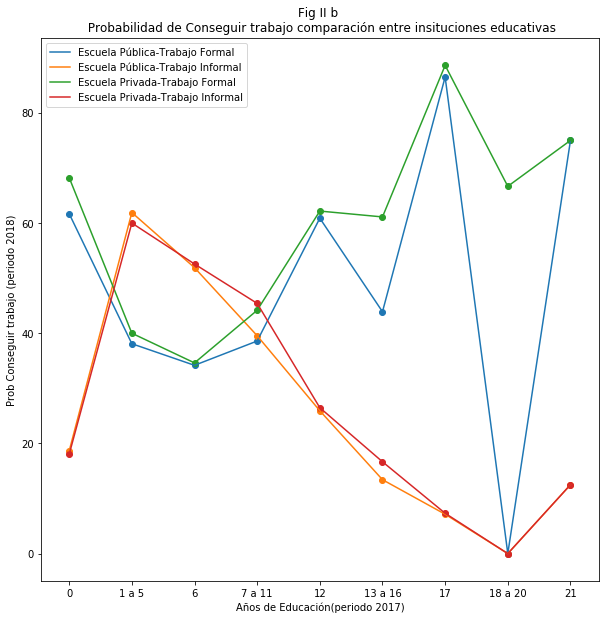

In [40]:
x1718puf = np.array([Prob1718pu.iat[5,0],Prob1718pu.iat[5,1],Prob1718pu.iat[5,7],Prob1718pu.iat[5,8],Prob1718pu.iat[5,2],Prob1718pu.iat[5,3],Prob1718pu.iat[5,4],Prob1718pu.iat[5,5],Prob1718pu.iat[5,6]])
x1718pui = np.array([Prob1718pu.iat[6,0],Prob1718pu.iat[6,1],Prob1718pu.iat[6,7],Prob1718pu.iat[6,8],Prob1718pu.iat[6,2],Prob1718pu.iat[6,3],Prob1718pu.iat[6,4],Prob1718pu.iat[6,5],Prob1718pu.iat[6,6]])
x1718prf = np.array([Prob1718pr.iat[5,0],Prob1718pr.iat[5,1],Prob1718pr.iat[5,7],Prob1718pr.iat[5,8],Prob1718pr.iat[5,2],Prob1718pr.iat[5,3],Prob1718pr.iat[5,4],Prob1718pr.iat[5,5],Prob1718pr.iat[5,6]])
x1718pri = np.array([Prob1718pr.iat[6,0],Prob1718pr.iat[6,1],Prob1718pr.iat[6,7],Prob1718pr.iat[6,8],Prob1718pr.iat[6,2],Prob1718pr.iat[6,3],Prob1718pr.iat[6,4],Prob1718pr.iat[6,5],Prob1718pr.iat[6,6]])

Años = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
x1 = np.arange(len(Años))

plt.figure(figsize=(10,10))

plt.plot(x1, x1718puf)
plt.scatter(x1, x1718puf)
plt.plot(x1, x1718pui)
plt.scatter(x1, x1718pui)

plt.plot(x1, x1718prf)
plt.scatter(x1, x1718prf)
plt.plot(x1, x1718pri)
plt.scatter(x1, x1718pri)

plt.title('Fig II b \n Probabilidad de Conseguir trabajo comparación entre insituciones educativas')

plt.xlabel('Años de Educación(periodo 2017)')
plt.ylabel('Prob Conseguir trabajo (periodo 2018)')

plt.xticks(x1,Años)

plt.legend(['Escuela Pública-Trabajo Formal','Escuela Pública-Trabajo Informal','Escuela Privada-Trabajo Formal','Escuela Privada-Trabajo Informal'])

plt.savefig("figIIb.png")
plt.show()


### Fig. IV.c : "Probabilidad de quedar desempleados, comparación entre géneros 2017-2018"

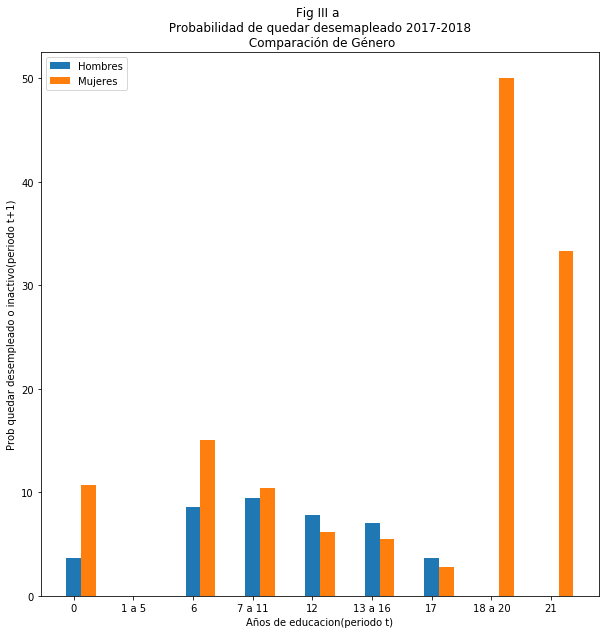

In [41]:
x1718hd = np.array([Prob1718h.iat[0,0],Prob1718h.iat[0,1],Prob1718h.iat[0,7],Prob1718h.iat[0,8],Prob1718h.iat[0,2],Prob1718h.iat[0,3],Prob1718h.iat[0,4],Prob1718h.iat[0,5],Prob1718h.iat[0,6]])
x1718md = np.array([Prob1718m.iat[0,0],Prob1718m.iat[0,1],Prob1718m.iat[0,7],Prob1718m.iat[0,8],Prob1718m.iat[0,2],Prob1718m.iat[0,3],Prob1718m.iat[0,4],Prob1718m.iat[0,5],Prob1718m.iat[0,6]])
Años = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
x2 = np.arange(len(Años))
bar_with = 0.25

plt.figure(figsize=(10,10))

plt.bar(x2, x1718hd, bar_with)
plt.bar(x2 + bar_with, x1718md, bar_with)

plt.title('Fig III a \n Probabilidad de quedar desemapleado 2017-2018 \n Comparación de Género')

plt.ylabel('Prob quedar desempleado o inactivo(periodo t+1)')
plt.xlabel('Años de educacion(periodo t)')

plt.xticks(x1, Años)

plt.legend(['Hombres','Mujeres'])

plt.savefig("figIIIa.png")
plt.show()

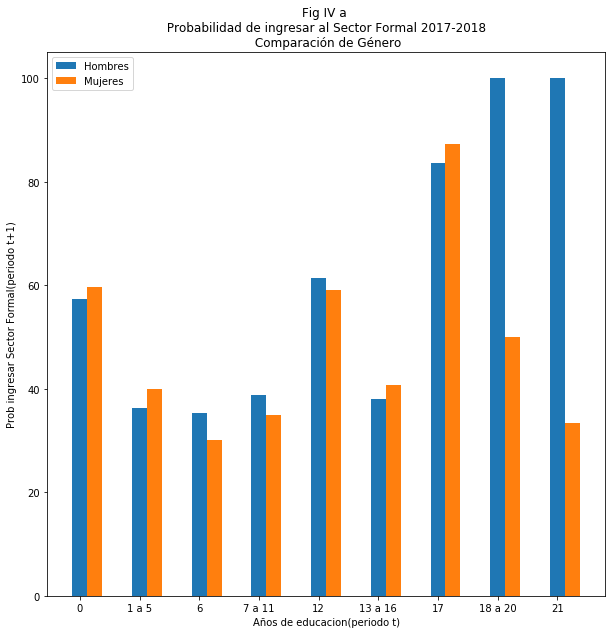

In [45]:
x1718hf = np.array( [Prob1718h.iat[5,0],Prob1718h.iat[5,1],Prob1718h.iat[5,7],Prob1718h.iat[5,8],Prob1718h.iat[5,2],Prob1718h.iat[5,3],Prob1718h.iat[5,4],Prob1718h.iat[5,5],Prob1718h.iat[5,6]])
x1718mf = np.array([Prob1718m.iat[5,0],Prob1718m.iat[5,1],Prob1718m.iat[5,7],Prob1718m.iat[5,8],Prob1718m.iat[5,2],Prob1718m.iat[5,3],Prob1718m.iat[5,4],Prob1718m.iat[5,5],Prob1718m.iat[5,6]])
Años = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
x2 = np.arange(len(Años))
bar_with = 0.25

plt.figure(figsize=(10,10))

plt.bar(x2, x1718hf, bar_with)
plt.bar(x2 + bar_with, x1718mf, bar_with)

plt.title('Fig IV a \n Probabilidad de ingresar al Sector Formal 2017-2018 \n Comparación de Género')

plt.ylabel('Prob ingresar Sector Formal(periodo t+1)')
plt.xlabel('Años de educacion(periodo t)')

plt.xticks(x1, Años)

plt.legend(['Hombres','Mujeres'])

plt.savefig("figIVa.png")
plt.show()

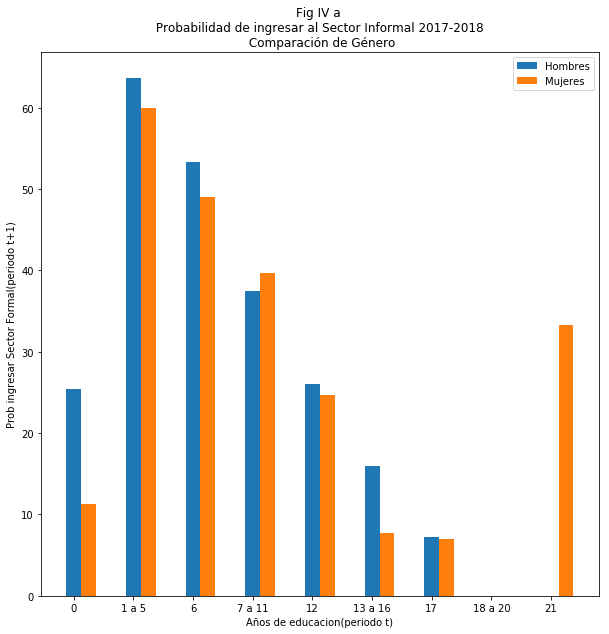

In [46]:
x1718hi = np.array([Prob1718h.iat[6,0],Prob1718h.iat[6,1],Prob1718h.iat[6,7],Prob1718h.iat[6,8],Prob1718h.iat[6,2],Prob1718h.iat[6,3],Prob1718h.iat[6,4],Prob1718h.iat[6,5],Prob1718h.iat[6,6]])
x1718mi = np.array([Prob1718m.iat[6,0],Prob1718m.iat[6,1],Prob1718m.iat[6,7],Prob1718m.iat[6,8],Prob1718m.iat[6,2],Prob1718m.iat[6,3],Prob1718m.iat[6,4],Prob1718m.iat[6,5],Prob1718m.iat[6,6]])

Años = ["0", "1 a 5", "6", "7 a 11", "12", "13 a 16", "17", "18 a 20", "21"]
x2 = np.arange(len(Años))
bar_with = 0.25

plt.figure(figsize=(10,10))

plt.bar(x2, x1718hi, bar_with)
plt.bar(x2 + bar_with, x1718mi, bar_with)

plt.title('Fig IV a \n Probabilidad de ingresar al Sector Informal 2017-2018 \n Comparación de Género')

plt.ylabel('Prob ingresar Sector Formal(periodo t+1)')
plt.xlabel('Años de educacion(periodo t)')

plt.xticks(x1, Años)

plt.legend(['Hombres','Mujeres'])

plt.savefig("figIVb.png")
plt.show()